=== PROJEKT SZTUCZNE SIECI NEURONOWE ===
Analiza danych szpitalnych z porównaniem k-NN
Ładowanie i przygotowanie danych...
Rozmiar danych: (318438, 18)
Kolumny: ['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay']
Liczba kolumn po przetworzeniu: 16

PROBLEM REGRESYJNY - Przewidywanie Admission_Deposit
Liczba cech: 15, Liczba próbek: 318438

Testowanie parametru: hidden_layers
  Testowanie hidden_layers = [5]
  Testowanie hidden_layers = [10]
  Testowanie hidden_layers = [20]
  Testowanie hidden_layers = [30]
  Testowanie hidden_layers = [10, 5]
  Testowanie hidden_layers = [20, 10]
  Testowanie hidden_layers = [30, 15]
  Testowanie hidden_layers = [20, 10, 5]
  Testowanie hidden_layers = [30, 20, 10]
  Testow

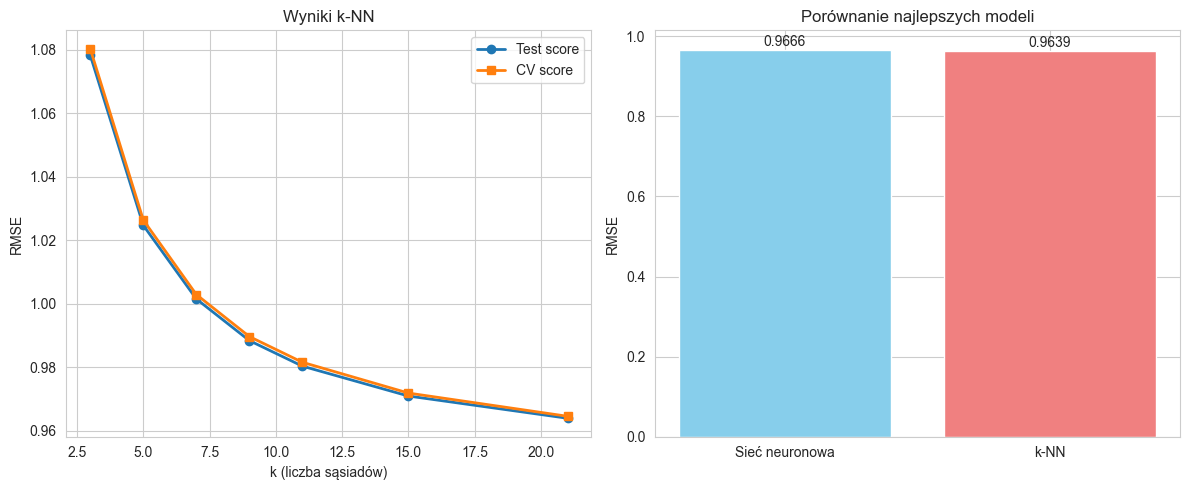


PORÓWNANIE MODELI - CLASSIFICATION

NAJLEPSZE WYNIKI:
Sieć neuronowa: Accuracy = 0.4521
  - Parametry: learning_rate = 0.2
  - Średnia ± std: 0.4502 ± 0.0020

k-NN: Accuracy = 0.4326
  - k = 21
  - Cross-validation: 0.4342


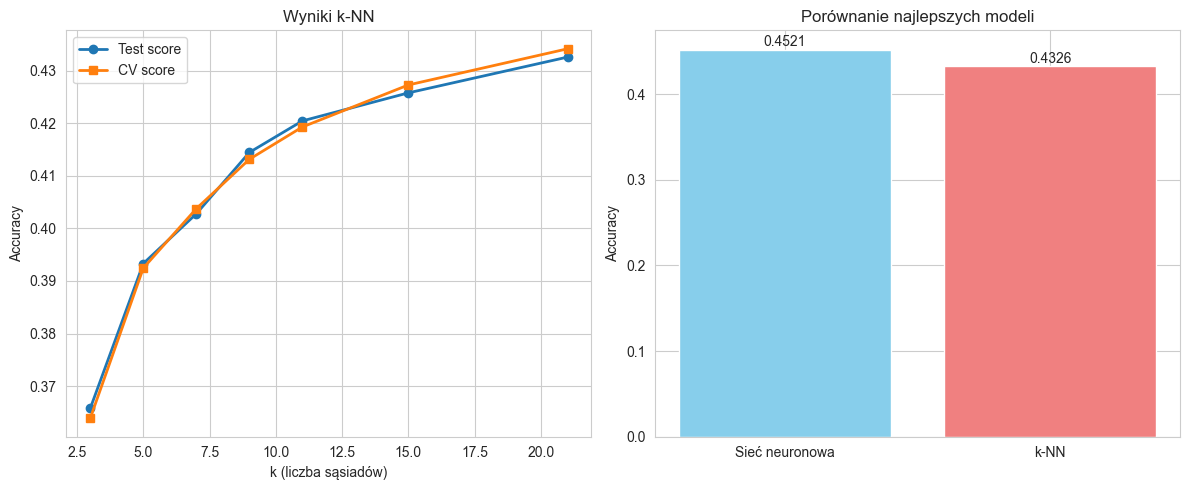


PODSUMOWANIE I WNIOSKI

1. ANALIZA ARCHITEKTURY SIECI:
   - Regresja: [30] (RMSE: 0.9766)
   - Klasyfikacja: [30] (Acc: 0.4069)

2. ANALIZA FUNKCJI AKTYWACJI:
   - Regresja: tanh (RMSE: 0.9753)
   - Klasyfikacja: tanh (Acc: 0.4258)

3. ANALIZA LEARNING RATE:
   - Regresja: 0.2 (RMSE: 0.9666)
   - Klasyfikacja: 0.2 (Acc: 0.4521)

4. PORÓWNANIE Z k-NN:
   - Regresja (RMSE): NN = 0.9666 vs k-NN = 0.9639
   - Klasyfikacja (Acc): NN = 0.4521 vs k-NN = 0.4326
   - Zwycięzca regresji: k-NN
   - Zwycięzca klasyfikacji: Sieć neuronowa

5. WNIOSKI KOŃCOWE:
   - Sieci neuronowe wykazują dużą elastyczność w dostosowaniu do różnych problemów
   - Architektury głębsze nie zawsze oznaczają lepsze wyniki
   - Funkcja aktywacji ma znaczący wpływ na wydajność
   - Learning rate wymaga starannego dostrojenia
   - k-NN stanowi solidny baseline do porównań

WIZUALIZACJA NAJLEPSZYCH MODELI

Trenowanie i wizualizacja najlepszego modelu regresyjnego...

Trenowanie najlepszego modelu z parametrami: {'hidden_l

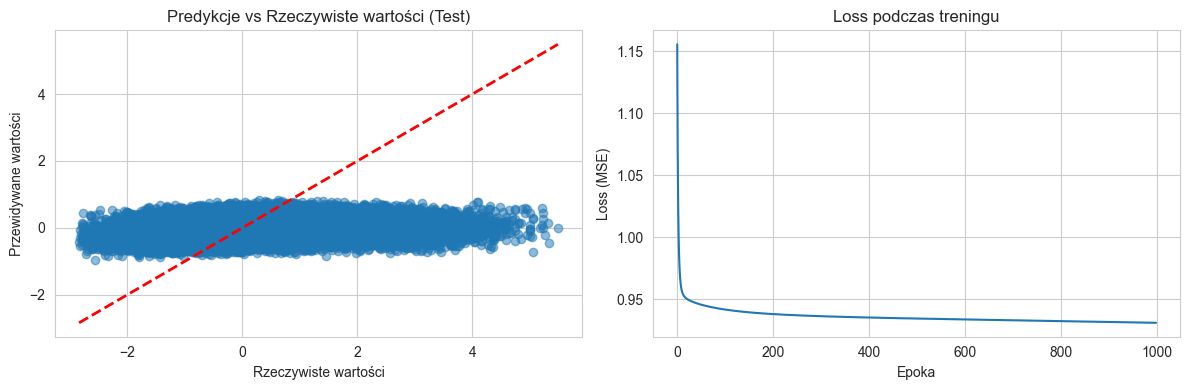


Trenowanie i wizualizacja najlepszego modelu klasyfikacyjnego...

Trenowanie najlepszego modelu z parametrami: {'hidden_layers': [30], 'activation': 'tanh', 'learning_rate': 0.2, 'epochs': 1500}
Epoch 0, Loss: 1.6243, Accuracy: 0.2539
Epoch 100, Loss: 1.3475, Accuracy: 0.4360
Epoch 200, Loss: 1.3395, Accuracy: 0.4388
Epoch 300, Loss: 1.3356, Accuracy: 0.4407
Epoch 400, Loss: 1.3323, Accuracy: 0.4419
Epoch 500, Loss: 1.3291, Accuracy: 0.4431
Epoch 600, Loss: 1.3259, Accuracy: 0.4442
Epoch 700, Loss: 1.3226, Accuracy: 0.4452
Epoch 800, Loss: 1.3192, Accuracy: 0.4464
Epoch 900, Loss: 1.3158, Accuracy: 0.4470
Epoch 1000, Loss: 1.3124, Accuracy: 0.4478
Epoch 1100, Loss: 1.3091, Accuracy: 0.4487
Epoch 1200, Loss: 1.3059, Accuracy: 0.4498
Epoch 1300, Loss: 1.3029, Accuracy: 0.4506
Epoch 1400, Loss: 1.3001, Accuracy: 0.4516

Wyniki najlepszego modelu:
Accuracy na zbiorze treningowym: 0.4525
Accuracy na zbiorze testowym: 0.4537


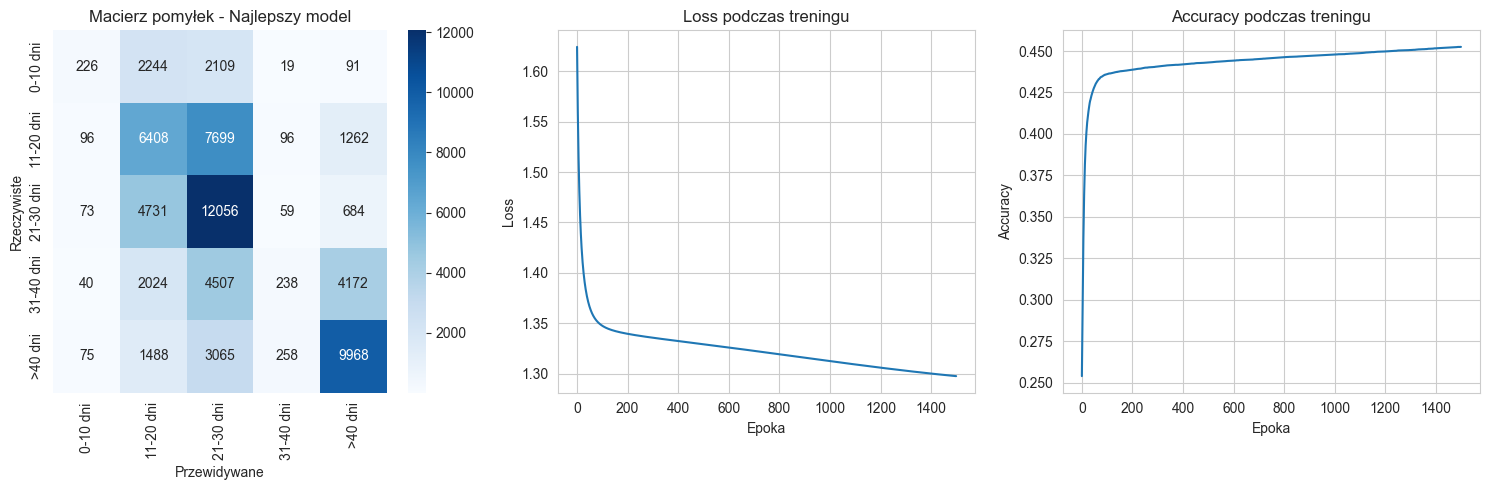


Raport klasyfikacji:
              precision    recall  f1-score   support

    0-10 dni       0.44      0.05      0.09      4689
   11-20 dni       0.38      0.41      0.39     15561
   21-30 dni       0.41      0.68      0.51     17603
   31-40 dni       0.36      0.02      0.04     10981
     >40 dni       0.62      0.67      0.64     14854

    accuracy                           0.45     63688
   macro avg       0.44      0.37      0.34     63688
weighted avg       0.44      0.45      0.40     63688


PROJEKT ZAKOŃCZONY POMYŚLNIE!
Najlepszy model regresyjny - RMSE: 0.9655
Najlepszy model klasyfikacyjny - Accuracy: 0.4537
Wszystkie wykresy i analizy zostały wygenerowane.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

class NeuralNetwork:
    """Implementacja sieci neuronowej od podstaw z obsługą regresji i klasyfikacji"""

    def __init__(self, input_size, hidden_layers, output_size, activation='relu', learning_rate=0.01, problem_type='regression'):
        self.layers = [input_size] + hidden_layers + [output_size]
        self.activation = activation
        self.learning_rate = learning_rate
        self.problem_type = problem_type
        self.weights = []
        self.biases = []
        self.history = {}

        # Xavier/He inicjalizacja wag
        for i in range(len(self.layers) - 1):
            if activation == 'relu':
                # He initialization dla ReLU
                w = np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(2.0 / self.layers[i])
            else:
                # Xavier initialization dla innych funkcji
                w = np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(1.0 / self.layers[i])
            b = np.zeros((1, self.layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)

    def _activation_function(self, x, derivative=False):
        """Ujednolicone funkcje aktywacji"""
        if self.activation == 'sigmoid':
            if derivative:
                sig = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
                return sig * (1 - sig)
            return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

        elif self.activation == 'relu':
            if derivative:
                return (x > 0).astype(float)
            return np.maximum(0, x)

        elif self.activation == 'tanh':
            if derivative:
                return 1 - np.tanh(x)**2
            return np.tanh(x)

        elif self.activation == 'leaky_relu':
            alpha = 0.01
            if derivative:
                return np.where(x > 0, 1, alpha)
            return np.where(x > 0, x, alpha * x)

    def _softmax(self, x):
        """Stabilna implementacja softmax"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        """Forward pass przez sieć"""
        self.z_values = []
        self.activations = [X]

        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)

            # Ostatnia warstwa
            if i == len(self.weights) - 1:
                if self.problem_type == 'classification' and self.layers[-1] > 1:
                    a = self._softmax(z)
                elif self.problem_type == 'classification':
                    a = self._activation_function(z)  # sigmoid dla klasyfikacji binarnej
                else:
                    a = z  # linear dla regresji
            else:
                a = self._activation_function(z)

            self.activations.append(a)
        return self.activations[-1]

    def backward(self, X, y, output):
        """Backward pass - aktualizacja wag"""
        m = X.shape[0]

        # Błąd dla ostatniej warstwy
        if self.problem_type == 'classification' and self.layers[-1] > 1:
            y_onehot = np.zeros((m, self.layers[-1]))
            y_onehot[np.arange(m), y.astype(int)] = 1
            delta = output - y_onehot
        else:
            y_reshaped = y.reshape(-1, 1) if len(y.shape) == 1 else y
            delta = output - y_reshaped

        # Propagacja wsteczna
        for i in reversed(range(len(self.weights))):
            self.weights[i] -= self.learning_rate * np.dot(self.activations[i].T, delta) / m
            self.biases[i] -= self.learning_rate * np.sum(delta, axis=0, keepdims=True) / m

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self._activation_function(self.z_values[i-1], derivative=True)

    def train(self, X, y, epochs=1000, verbose=False):
        """Trenowanie sieci"""
        losses, accuracies = [], []

        for epoch in range(epochs):
            output = self.forward(X)

            # Obliczenie loss i accuracy
            if self.problem_type == 'classification' and self.layers[-1] > 1:
                y_onehot = np.zeros((len(y), self.layers[-1]))
                y_onehot[np.arange(len(y)), y.astype(int)] = 1
                loss = -np.mean(np.sum(y_onehot * np.log(output + 1e-15), axis=1))
                accuracy = np.mean(np.argmax(output, axis=1) == y)
                accuracies.append(accuracy)
            else:
                y_reshaped = y.reshape(-1, 1) if len(y.shape) == 1 else y
                loss = np.mean((output - y_reshaped)**2)
                accuracies.append(0)

            losses.append(loss)
            self.backward(X, y, output)

            if verbose and epoch % 100 == 0:
                if self.problem_type == 'classification':
                    print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
                else:
                    print(f'Epoch {epoch}, Loss: {loss:.4f}')

        self.history = {'loss': losses, 'accuracy': accuracies}
        return losses

    def predict(self, X):
        """Predykcja"""
        output = self.forward(X)
        if self.problem_type == 'classification' and self.layers[-1] > 1:
            return np.argmax(output, axis=1)
        return output


class DataProcessor:
    """Klasa do przetwarzania danych"""

    def __init__(self):
        self.encoders = {}
        self.scalers = {}

    def load_and_prepare_data(self, filepath='train_data.csv'):
        """Ładowanie i podstawowe przetwarzanie danych"""
        print("Ładowanie i przygotowanie danych...")

        df = pd.read_csv(filepath, sep=';')
        print(f"Rozmiar danych: {df.shape}")
        print(f"Kolumny: {df.columns.tolist()}")

        # Usunięcie niepotrzebnych kolumn
        df = df.drop(['case_id', 'patientid'], axis=1, errors='ignore')

        # Kodowanie zmiennych kategorycznych
        categorical_columns = ['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
                              'Type of Admission', 'Severity of Illness', 'Age', 'Stay', 'Hospital_region_code']

        for col in categorical_columns:
            if col in df.columns:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                self.encoders[col] = le

        # Uzupełnienie brakujących wartości
        df = df.fillna(df.mean())

        print(f"Liczba kolumn po przetworzeniu: {df.shape[1]}")
        return df

    def prepare_regression_data(self, df, target_col='Admission_Deposit'):
        """Przygotowanie danych dla problemu regresyjnego"""
        X = df.drop([target_col], axis=1).values
        y = df[target_col].values

        # Normalizacja
        self.scalers['X_reg'] = StandardScaler()
        self.scalers['y_reg'] = StandardScaler()

        X_scaled = self.scalers['X_reg'].fit_transform(X)
        y_scaled = self.scalers['y_reg'].fit_transform(y.reshape(-1, 1)).flatten()

        return train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    def prepare_classification_data(self, df, target_col='Stay'):
        """Przygotowanie danych dla problemu klasyfikacyjnego"""
        X = df.drop([target_col], axis=1).values
        y_original = df[target_col].values

        # Mapowanie kategorii dla długości pobytu
        def categorize_stay(stay_encoded):
            stay_original = self.encoders[target_col].inverse_transform([stay_encoded])[0]
            if '0-10' in stay_original: return 0
            elif '11-20' in stay_original: return 1
            elif '21-30' in stay_original: return 2
            elif '31-40' in stay_original: return 3
            else: return 4

        y = np.array([categorize_stay(stay) for stay in y_original])

        # Normalizacja tylko X
        self.scalers['X_class'] = StandardScaler()
        X_scaled = self.scalers['X_class'].fit_transform(X)

        print(f"Rozkład klas: {np.bincount(y)}")
        print("Kategorie: 0=0-10dni, 1=11-20dni, 2=21-30dni, 3=31-40dni, 4=>40dni")

        return train_test_split(X_scaled, y, test_size=0.2, random_state=42)


class ModelEvaluator:
    """Klasa do ewaluacji i testowania modeli"""

    @staticmethod
    def test_parameters(X_train, X_test, y_train, y_test, param_name, param_values,
                       base_params, problem_type='regression', n_trials=3):
        """Testowanie różnych wartości parametrów"""
        results = []
        print(f"\nTestowanie parametru: {param_name}")

        for param_value in param_values:
            print(f"  Testowanie {param_name} = {param_value}")

            train_scores, test_scores = [], []

            for trial in range(n_trials):
                # Tworzenie modelu z odpowiednimi parametrami
                params = base_params.copy()
                params[param_name] = param_value

                nn = NeuralNetwork(
                    input_size=X_train.shape[1],
                    hidden_layers=params.get('hidden_layers', [10]),
                    output_size=5 if problem_type == 'classification' else 1,
                    activation=params.get('activation', 'relu'),
                    learning_rate=params.get('learning_rate', 0.01),
                    problem_type=problem_type
                )

                # Trenowanie
                nn.train(X_train, y_train, epochs=params.get('epochs', 500))

                # Ewaluacja
                train_pred = nn.predict(X_train)
                test_pred = nn.predict(X_test)

                if problem_type == 'regression':
                    train_pred = train_pred.flatten()
                    test_pred = test_pred.flatten()
                    train_score = np.sqrt(mean_squared_error(y_train, train_pred))
                    test_score = np.sqrt(mean_squared_error(y_test, test_pred))
                else:
                    train_score = accuracy_score(y_train, train_pred)
                    test_score = accuracy_score(y_test, test_pred)

                train_scores.append(train_score)
                test_scores.append(test_score)

            # Zapisanie wyników
            results.append({
                'parameter': param_name,
                'value': str(param_value),
                'train_mean': np.mean(train_scores),
                'train_std': np.std(train_scores),
                'train_best': np.min(train_scores) if problem_type == 'regression' else np.max(train_scores),
                'test_mean': np.mean(test_scores),
                'test_std': np.std(test_scores),
                'test_best': np.min(test_scores) if problem_type == 'regression' else np.max(test_scores)
            })

        return results

    @staticmethod
    def test_knn(X_train, X_test, y_train, y_test, problem_type='regression'):
        """Testowanie algorytmu k-NN dla porównania"""
        print(f"\nTestowanie k-NN dla problemu {problem_type}...")

        k_values = [3, 5, 7, 9, 11, 15, 21]
        results = []

        for k in k_values:
            print(f"  Testowanie k = {k}")

            if problem_type == 'regression':
                model = KNeighborsRegressor(n_neighbors=k)
                model.fit(X_train, y_train)

                train_pred = model.predict(X_train)
                test_pred = model.predict(X_test)

                train_score = np.sqrt(mean_squared_error(y_train, train_pred))
                test_score = np.sqrt(mean_squared_error(y_test, test_pred))

                # Cross-validation dla bardziej wiarygodnych wyników
                cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                          scoring='neg_mean_squared_error')
                cv_score = np.sqrt(-cv_scores.mean())

            else:  # classification
                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(X_train, y_train)

                train_pred = model.predict(X_train)
                test_pred = model.predict(X_test)

                train_score = accuracy_score(y_train, train_pred)
                test_score = accuracy_score(y_test, test_pred)

                # Cross-validation
                cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
                cv_score = cv_scores.mean()

            results.append({
                'k': k,
                'train_score': train_score,
                'test_score': test_score,
                'cv_score': cv_score,
                'model': model
            })

        return results

    @staticmethod
    def visualize_best_model(X_train, X_test, y_train, y_test, best_params, problem_type='classification'):
        """Wizualizacja najlepszego modelu"""
        print(f"\nTrenowanie najlepszego modelu z parametrami: {best_params}")

        nn = NeuralNetwork(
            input_size=X_train.shape[1],
            hidden_layers=best_params['hidden_layers'],
            output_size=5 if problem_type == 'classification' else 1,
            activation=best_params['activation'],
            learning_rate=best_params['learning_rate'],
            problem_type=problem_type
        )

        nn.train(X_train, y_train, epochs=best_params['epochs'], verbose=True)

        y_pred_test = nn.predict(X_test)
        y_pred_train = nn.predict(X_train)

        if problem_type == 'classification':
            class_names = ['0-10 dni', '11-20 dni', '21-30 dni', '31-40 dni', '>40 dni']

            train_acc = accuracy_score(y_train, y_pred_train)
            test_acc = accuracy_score(y_test, y_pred_test)

            print(f"\nWyniki najlepszego modelu:")
            print(f"Accuracy na zbiorze treningowym: {train_acc:.4f}")
            print(f"Accuracy na zbiorze testowym: {test_acc:.4f}")

            # Wizualizacje
            plt.figure(figsize=(15, 5))

            # Macierz pomyłek
            plt.subplot(1, 3, 1)
            cm = confusion_matrix(y_test, y_pred_test)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=class_names, yticklabels=class_names)
            plt.title('Macierz pomyłek - Najlepszy model')
            plt.xlabel('Przewidywane')
            plt.ylabel('Rzeczywiste')

            # Historia treningu
            plt.subplot(1, 3, 2)
            plt.plot(nn.history['loss'])
            plt.title('Loss podczas treningu')
            plt.xlabel('Epoka')
            plt.ylabel('Loss')
            plt.grid(True)

            plt.subplot(1, 3, 3)
            plt.plot(nn.history['accuracy'])
            plt.title('Accuracy podczas treningu')
            plt.xlabel('Epoka')
            plt.ylabel('Accuracy')
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            print("\nRaport klasyfikacji:")
            print(classification_report(y_test, y_pred_test, target_names=class_names))

            return nn, test_acc

        else:  # regression
            y_pred_test = y_pred_test.flatten()
            y_pred_train = y_pred_train.flatten()

            train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

            print(f"\nWyniki najlepszego modelu:")
            print(f"RMSE na zbiorze treningowym: {train_rmse:.4f}")
            print(f"RMSE na zbiorze testowym: {test_rmse:.4f}")

            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.scatter(y_test, y_pred_test, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            plt.xlabel('Rzeczywiste wartości')
            plt.ylabel('Przewidywane wartości')
            plt.title('Predykcje vs Rzeczywiste wartości (Test)')
            plt.grid(True)

            plt.subplot(1, 2, 2)
            plt.plot(nn.history['loss'])
            plt.title('Loss podczas treningu')
            plt.xlabel('Epoka')
            plt.ylabel('Loss (MSE)')
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            return nn, test_rmse

    @staticmethod
    def compare_models(nn_results, knn_results, problem_type='classification'):
        """Porównanie wyników sieci neuronowej z k-NN"""
        print(f"\n{'='*60}")
        print(f"PORÓWNANIE MODELI - {problem_type.upper()}")
        print(f"{'='*60}")

        if problem_type == 'classification':
            best_nn = max(nn_results, key=lambda x: x['test_best'])
            best_knn = max(knn_results, key=lambda x: x['test_score'])
            metric_name = "Accuracy"
        else:
            best_nn = min(nn_results, key=lambda x: x['test_best'])
            best_knn = min(knn_results, key=lambda x: x['test_score'])
            metric_name = "RMSE"

        print(f"\nNAJLEPSZE WYNIKI:")
        print(f"Sieć neuronowa: {metric_name} = {best_nn['test_best']:.4f}")
        print(f"  - Parametry: {best_nn['parameter']} = {best_nn['value']}")
        print(f"  - Średnia ± std: {best_nn['test_mean']:.4f} ± {best_nn['test_std']:.4f}")

        print(f"\nk-NN: {metric_name} = {best_knn['test_score']:.4f}")
        print(f"  - k = {best_knn['k']}")
        print(f"  - Cross-validation: {best_knn['cv_score']:.4f}")

        # Wykres porównawczy
        plt.figure(figsize=(12, 5))

        # Wyniki k-NN
        plt.subplot(1, 2, 1)
        k_vals = [r['k'] for r in knn_results]
        test_scores = [r['test_score'] for r in knn_results]
        cv_scores = [r['cv_score'] for r in knn_results]

        plt.plot(k_vals, test_scores, 'o-', label='Test score', linewidth=2)
        plt.plot(k_vals, cv_scores, 's-', label='CV score', linewidth=2)
        plt.xlabel('k (liczba sąsiadów)')
        plt.ylabel(f'{metric_name}')
        plt.title('Wyniki k-NN')
        plt.legend()
        plt.grid(True)

        # Porównanie najlepszych wyników
        plt.subplot(1, 2, 2)
        models = ['Sieć neuronowa', 'k-NN']
        scores = [best_nn['test_best'], best_knn['test_score']]
        colors = ['skyblue', 'lightcoral']

        bars = plt.bar(models, scores, color=colors)
        plt.ylabel(f'{metric_name}')
        plt.title('Porównanie najlepszych modeli')

        # Dodanie wartości na słupkach
        for bar, score in zip(bars, scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                    f'{score:.4f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        return best_nn, best_knn


def main():
    """Główna funkcja projektu"""
    print("=== PROJEKT SZTUCZNE SIECI NEURONOWE ===")
    print("Analiza danych szpitalnych z porównaniem k-NN")

    # Inicjalizacja klas
    processor = DataProcessor()
    evaluator = ModelEvaluator()

    # Przygotowanie danych
    df = processor.load_and_prepare_data()

    # Rozszerzone parametry do testowania
    test_params = {
        'hidden_layers': [
            [5],           # jedna warstwa - 5 neuronów
            [10],          # jedna warstwa - 10 neuronów
            [20],          # jedna warstwa - 20 neuronów
            [30],          # jedna warstwa - 30 neuronów
            [10, 5],       # dwie warstwy
            [20, 10],      # dwie warstwy
            [30, 15],      # dwie warstwy
            [20, 10, 5],   # trzy warstwy
            [30, 20, 10],  # trzy warstwy
            [50, 25, 10]   # trzy warstwy - większe
        ],
        'activation': ['sigmoid', 'relu', 'tanh', 'leaky_relu'],
        'learning_rate': [0.001, 0.01, 0.1, 0.2]
    }

    # ========================================
    # PROBLEM REGRESYJNY
    # ========================================
    print("\n" + "="*50)
    print("PROBLEM REGRESYJNY - Przewidywanie Admission_Deposit")
    print("="*50)

    X_train_reg, X_test_reg, y_train_reg, y_test_reg = processor.prepare_regression_data(df)
    print(f"Liczba cech: {X_train_reg.shape[1]}, Liczba próbek: {X_train_reg.shape[0] + X_test_reg.shape[0]}")

    base_params_reg = {'hidden_layers': [10], 'activation': 'relu', 'learning_rate': 0.01, 'epochs': 500}
    all_results_reg = []

    # Testowanie sieci neuronowej
    for param_name, param_values in test_params.items():
        results = evaluator.test_parameters(X_train_reg, X_test_reg, y_train_reg, y_test_reg,
                                          param_name, param_values, base_params_reg, 'regression')
        all_results_reg.extend(results)

    # Testowanie k-NN
    knn_results_reg = evaluator.test_knn(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')

    # ========================================
    # PROBLEM KLASYFIKACYJNY
    # ========================================
    print("\n" + "="*50)
    print("PROBLEM KLASYFIKACYJNY - Klasyfikacja długości pobytu")
    print("="*50)

    X_train_class, X_test_class, y_train_class, y_test_class = processor.prepare_classification_data(df)
    print(f"Liczba cech: {X_train_class.shape[1]}, Liczba próbek: {X_train_class.shape[0] + X_test_class.shape[0]}")

    base_params_class = {'hidden_layers': [20, 10], 'activation': 'relu', 'learning_rate': 0.01, 'epochs': 1000}
    all_results_class = []

    # Testowanie sieci neuronowej
    for param_name, param_values in test_params.items():
        results = evaluator.test_parameters(X_train_class, X_test_class, y_train_class, y_test_class,
                                          param_name, param_values, base_params_class, 'classification')
        all_results_class.extend(results)

    # Testowanie k-NN
    knn_results_class = evaluator.test_knn(X_train_class, X_test_class, y_train_class, y_test_class, 'classification')

    # ========================================
    # WYNIKI I ANALIZA
    # ========================================
    print("\n" + "="*80)
    print("SZCZEGÓŁOWE WYNIKI ANALIZY")
    print("="*80)

    # Wyświetlenie wyników sieci neuronowej
    for problem_type, results, metric in [("REGRESYJNY (RMSE)", all_results_reg, "im mniej, tym lepiej"),
                                         ("KLASYFIKACYJNY (Accuracy)", all_results_class, "im więcej, tym lepiej")]:
        print(f"\nPROBLEM {problem_type} - SIEĆ NEURONOWA:")
        print("-" * 100)
        print(f"{'Parametr':<15} {'Wartość':<20} {'Train śr.±std':<18} {'Test śr.±std':<18} {'Test najl.':<12}")
        print("-" * 100)
        for result in results:
            print(f"{result['parameter']:<15} {result['value']:<20} "
                  f"{result['train_mean']:.4f}±{result['train_std']:.3f}     "
                  f"{result['test_mean']:.4f}±{result['test_std']:.3f}     "
                  f"{result['test_best']:.4f}")

    # Wyświetlenie wyników k-NN
    print(f"\nPROBLEM REGRESYJNY - k-NN (RMSE):")
    print("-" * 60)
    print(f"{'k':<5} {'Train':<12} {'Test':<12} {'CV':<12}")
    print("-" * 60)
    for result in knn_results_reg:
        print(f"{result['k']:<5} {result['train_score']:.4f}      "
              f"{result['test_score']:.4f}     {result['cv_score']:.4f}")

    print(f"\nPROBLEM KLASYFIKACYJNY - k-NN (Accuracy):")
    print("-" * 60)
    print(f"{'k':<5} {'Train':<12} {'Test':<12} {'CV':<12}")
    print("-" * 60)
    for result in knn_results_class:
        print(f"{result['k']:<5} {result['train_score']:.4f}      "
              f"{result['test_score']:.4f}     {result['cv_score']:.4f}")

    # Porównanie modeli
    best_nn_reg, best_knn_reg = evaluator.compare_models(all_results_reg, knn_results_reg, 'regression')
    best_nn_class, best_knn_class = evaluator.compare_models(all_results_class, knn_results_class, 'classification')

    # ========================================
    # WNIOSKI KOŃCOWE
    # ========================================
    print(f"\n" + "="*80)
    print("PODSUMOWANIE I WNIOSKI")
    print("="*80)

    print("\n1. ANALIZA ARCHITEKTURY SIECI:")

    # Znajdź najlepsze architektury
    layer_results_reg = [r for r in all_results_reg if r['parameter'] == 'hidden_layers']
    layer_results_class = [r for r in all_results_class if r['parameter'] == 'hidden_layers']

    best_arch_reg = min(layer_results_reg, key=lambda x: x['test_best'])
    best_arch_class = max(layer_results_class, key=lambda x: x['test_best'])

    print(f"   - Regresja: {best_arch_reg['value']} (RMSE: {best_arch_reg['test_best']:.4f})")
    print(f"   - Klasyfikacja: {best_arch_class['value']} (Acc: {best_arch_class['test_best']:.4f})")

    print("\n2. ANALIZA FUNKCJI AKTYWACJI:")
    activation_results_reg = [r for r in all_results_reg if r['parameter'] == 'activation']
    activation_results_class = [r for r in all_results_class if r['parameter'] == 'activation']

    best_act_reg = min(activation_results_reg, key=lambda x: x['test_best'])
    best_act_class = max(activation_results_class, key=lambda x: x['test_best'])

    print(f"   - Regresja: {best_act_reg['value']} (RMSE: {best_act_reg['test_best']:.4f})")
    print(f"   - Klasyfikacja: {best_act_class['value']} (Acc: {best_act_class['test_best']:.4f})")

    print("\n3. ANALIZA LEARNING RATE:")
    lr_results_reg = [r for r in all_results_reg if r['parameter'] == 'learning_rate']
    lr_results_class = [r for r in all_results_class if r['parameter'] == 'learning_rate']

    best_lr_reg = min(lr_results_reg, key=lambda x: x['test_best'])
    best_lr_class = max(lr_results_class, key=lambda x: x['test_best'])

    print(f"   - Regresja: {best_lr_reg['value']} (RMSE: {best_lr_reg['test_best']:.4f})")
    print(f"   - Klasyfikacja: {best_lr_class['value']} (Acc: {best_lr_class['test_best']:.4f})")

    print("\n4. PORÓWNANIE Z k-NN:")
    print(f"   - Regresja (RMSE): NN = {best_nn_reg['test_best']:.4f} vs k-NN = {best_knn_reg['test_score']:.4f}")
    print(f"   - Klasyfikacja (Acc): NN = {best_nn_class['test_best']:.4f} vs k-NN = {best_knn_class['test_score']:.4f}")

    # Określenie zwycięzcy
    reg_winner = "Sieć neuronowa" if best_nn_reg['test_best'] < best_knn_reg['test_score'] else "k-NN"
    class_winner = "Sieć neuronowa" if best_nn_class['test_best'] > best_knn_class['test_score'] else "k-NN"

    print(f"   - Zwycięzca regresji: {reg_winner}")
    print(f"   - Zwycięzca klasyfikacji: {class_winner}")

    print("\n5. WNIOSKI KOŃCOWE:")
    print("   - Sieci neuronowe wykazują dużą elastyczność w dostosowaniu do różnych problemów")
    print("   - Architektury głębsze nie zawsze oznaczają lepsze wyniki")
    print("   - Funkcja aktywacji ma znaczący wpływ na wydajność")
    print("   - Learning rate wymaga starannego dostrojenia")
    print("   - k-NN stanowi solidny baseline do porównań")

    # ========================================
    # WIZUALIZACJA NAJLEPSZYCH MODELI
    # ========================================
    print(f"\n" + "="*80)
    print("WIZUALIZACJA NAJLEPSZYCH MODELI")
    print("="*80)

    # Znajdź najlepsze parametry dla każdego problemu
    best_params_reg = {
        'hidden_layers': eval(best_arch_reg['value']),
        'activation': best_act_reg['value'],
        'learning_rate': float(best_lr_reg['value']),
        'epochs': 1000
    }

    best_params_class = {
        'hidden_layers': eval(best_arch_class['value']),
        'activation': best_act_class['value'],
        'learning_rate': float(best_lr_class['value']),
        'epochs': 1500
    }

    print("\nTrenowanie i wizualizacja najlepszego modelu regresyjnego...")
    best_model_reg, final_rmse = evaluator.visualize_best_model(
        X_train_reg, X_test_reg, y_train_reg, y_test_reg,
        best_params_reg, 'regression'
    )

    print("\nTrenowanie i wizualizacja najlepszego modelu klasyfikacyjnego...")
    best_model_class, final_acc = evaluator.visualize_best_model(
        X_train_class, X_test_class, y_train_class, y_test_class,
        best_params_class, 'classification'
    )

    print(f"\n" + "="*80)
    print("PROJEKT ZAKOŃCZONY POMYŚLNIE!")
    print("="*80)
    print(f"Najlepszy model regresyjny - RMSE: {final_rmse:.4f}")
    print(f"Najlepszy model klasyfikacyjny - Accuracy: {final_acc:.4f}")
    print("Wszystkie wykresy i analizy zostały wygenerowane.")
    print("="*80)


if __name__ == "__main__":
    main()